# How to choose a college: An analysis of debt and earnings
NYU's Stern School of Business - Data Bootcamp  
Sila Gurmen (sg4286@stern.nyu.edu), Troy Manos (tpm293@stern.nyu.edu), Asad Shaikh (ars437@stern.nyu.edu) - May 2016.

## Executive Summary

Is a college education worth it? There's a lot of debate around the value of higher education and if hight tuition costs justify pursuing a degree. However there is no doubt that college is becoming the new minimum level of education one must attain in order to compete in the 21st century job market. 

So say you do decide to go to college, but you dont want to be saddled with crushing debt that you'll be paying back for years to come. Which college should you choose? Using college scorecard data from the U.S. Department of Education, the following analysis examines the relationship between U.S. universities, debt, and expected future earnings.  


In [1]:
import pandas as pd             # data package
import matplotlib.pyplot as plt # graphics 
import sys                      # system module, used to get Python version 
import os                       # operating system tools (check files)
import datetime as dt           # date tools, used to note current date  
import numpy as np

# these are new 
import requests, io             # internet and input tools  

import numpy as np

%matplotlib inline 

print('\nPython version: ', sys.version) 
print('Pandas version: ', pd.__version__)
print('Requests version: ', requests.__version__)
print("Today's date:", dt.date.today())


Python version:  3.5.1 |Anaconda 2.4.1 (x86_64)| (default, Dec  7 2015, 11:24:55) 
[GCC 4.2.1 (Apple Inc. build 5577)]
Pandas version:  0.17.1
Requests version:  2.9.1
Today's date: 2016-05-04


In [2]:
#import scorecard data from csv file on the web
url = 'https://collegescorecard.ed.gov/downloads/Most-Recent-Cohorts-Scorecard-Elements.csv'
r = requests.get(url)
#read csv data, create a dataframe with the csv data
scorecard  = pd.read_csv(url,
                        na_values=['PrivacySuppressed'])
scorecard1 = pd.DataFrame(scorecard)
#create a new data frame with only the relevant columns
newscore = scorecard1[['INSTNM', 'CITY', 'STABBR', 'PREDDEG',
            'CONTROL', 'LOCALE', 'SAT_AVG', 'UGDS', 'UGDS_BLACK', 'UGDS_ASIAN',
           'UGDS_HISP', 'UGDS_WHITE', 'md_earn_wne_p10', 'PCTFLOAN', 'gt_25k_p6',
           'GRAD_DEBT_MDN_SUPP', 'GRAD_DEBT_MDN10YR_SUPP']]
#rename the columns so we can read them easily
newscore2 = newscore.rename(columns={'INSTNM': 'UNIVERSITY', 'STABBR': 'STATE', 'PREDDEG': 'DEGTYPE', 
                         'md_earn_wne_p10': 'MEDIAN EARNINGS, 10 YEARS OUT',
                         'gt_25k_p6': 'PERCENT EARNING 25k+, 6 YRS OUT', 
                         'GRAD_DEBT_MDN_SUPP': 'MEDIAN DEBT',
                        'GRAD_DEBT_MDN10YR_SUPP': 'MEDIAN 10-YR MONTHLY PAYMENTS'})

In [3]:
topmedian = newscore2.sort('MEDIAN EARNINGS, 10 YEARS OUT', ascending=False).head(20)
topmedian2 = topmedian.set_index('UNIVERSITY')
topmedian3 = topmedian2.sort('MEDIAN EARNINGS, 10 YEARS OUT', ascending=True)

topmedianalt = newscore2.sort('MEDIAN EARNINGS, 10 YEARS OUT', ascending=True).head(20)
topmedianalt2 = topmedianalt.set_index('UNIVERSITY')
topmedianalt3 = topmedianalt2.sort('MEDIAN EARNINGS, 10 YEARS OUT', ascending=False)

//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':
//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:3: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  app.launch_new_instance()
//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:5: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:7: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


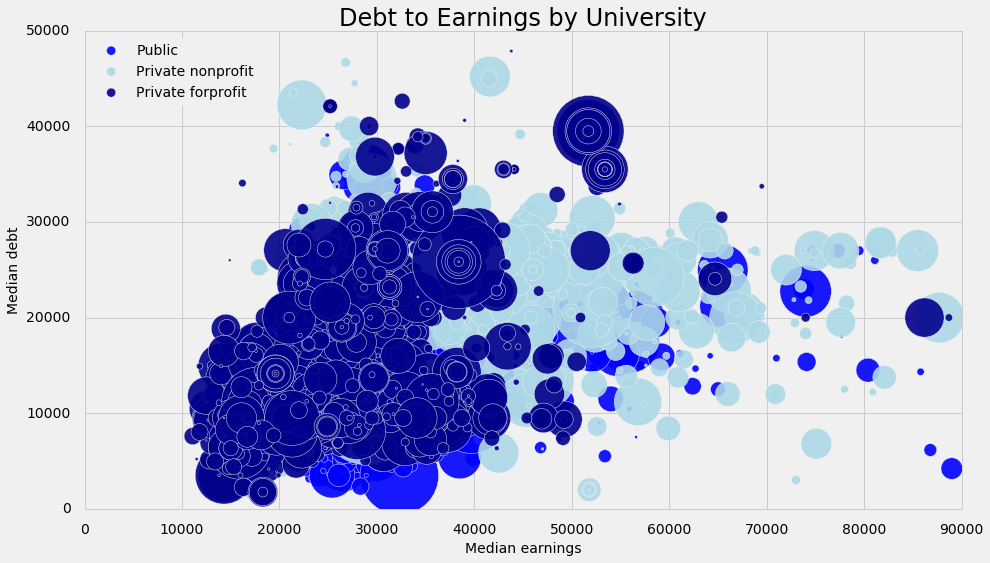

In [4]:
plt.style.use('fivethirtyeight')
fig, ax = plt.subplots()
fig.set_size_inches(14, 8)
ax.spines['left'].set_position(('outward', 10))
ax.spines['bottom'].set_position(('outward', 10))
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.set_xlim(0,90000)
ax.set_ylim(0,50000)

x = newscore2['MEDIAN EARNINGS, 10 YEARS OUT']
y = newscore2['MEDIAN DEBT']
colors = 'CONTROL'== 1 == 'red', 2 == 'blue', 3 =='green'

Public = plt.scatter(newscore2[newscore["CONTROL"] == 1]["MEDIAN EARNINGS, 10 YEARS OUT"],
            newscore2[newscore["CONTROL"] == 1]["MEDIAN DEBT"],
            s=newscore2['UGDS']/10, c="blue", alpha=0.9)
Private_nonprofit = plt.scatter(newscore2[newscore["CONTROL"] == 2]["MEDIAN EARNINGS, 10 YEARS OUT"],
            newscore2[newscore["CONTROL"] == 2]["MEDIAN DEBT"],
            s=newscore2['UGDS']/10, c="lightblue", alpha=0.9)
Private_forprofit = plt.scatter(newscore2[newscore["CONTROL"] == 3]["MEDIAN EARNINGS, 10 YEARS OUT"],
            newscore2[newscore["CONTROL"] == 3]["MEDIAN DEBT"],
            s=newscore2['UGDS']/10, c="darkblue", alpha=0.9)
plt.legend((Public, Private_nonprofit, Private_forprofit),
           ('Public', 'Private nonprofit', 'Private forprofit'),
           scatterpoints=1,
           markerscale=.1,
           loc='upper left',
           ncol=1,
           fontsize=14)
plt.xlabel('Median earnings', size=14)
plt.ylabel('Median debt', size=14)
plt.title('Debt to Earnings by University', fontsize=24)
plt.show()

## Debt to Earnings by University

The above graph displays U.S. universities by median debt per student versus median earnings per student approximately ten years after graduation. The ideal quadrant is the lower right quadrant as it implies high earnings and low debt. 

We see that private for-profit universities don't necessarily command higher wages. However, private nonprofit institutions do command higher median wages. Public institutions tend to have a lower overall median debt burden than private institutions and not a considerable difference in terms of median earnings.

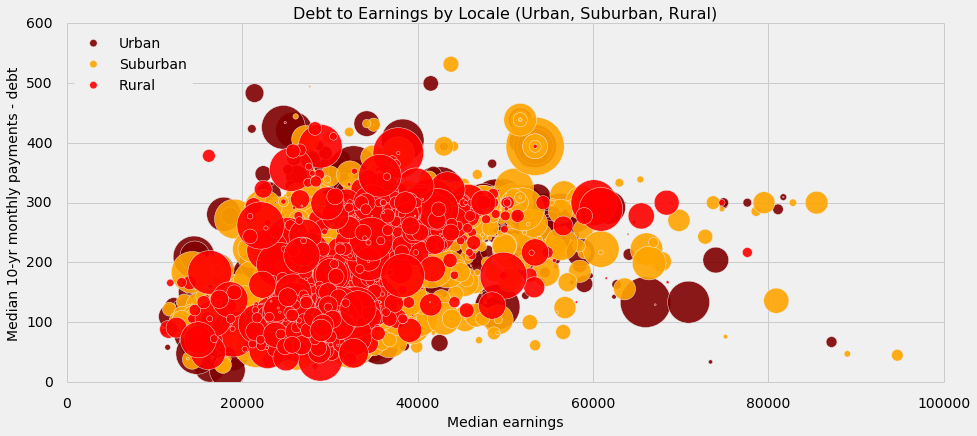

In [5]:
plt.style.use('fivethirtyeight')
fig, ax = plt.subplots()
fig.set_size_inches(14, 6)
ax.spines['left'].set_position(('outward', 10))
ax.spines['bottom'].set_position(('outward', 10))
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.set_xlim(0,100000)
ax.set_ylim(0,600)

x = newscore2['MEDIAN EARNINGS, 10 YEARS OUT']
y = newscore2['MEDIAN DEBT']

Urban = plt.scatter(newscore2[newscore["LOCALE"] == 12]["MEDIAN EARNINGS, 10 YEARS OUT"],
            newscore2[newscore["LOCALE"] == 12]["MEDIAN 10-YR MONTHLY PAYMENTS"],
            s=newscore2['UGDS']/15, c="maroon", alpha=0.9)
plt.scatter(newscore2[newscore["LOCALE"] == 13]["MEDIAN EARNINGS, 10 YEARS OUT"],
            newscore2[newscore["LOCALE"] == 13]["MEDIAN 10-YR MONTHLY PAYMENTS"],
            s=newscore2['UGDS']/15, c="maroon", alpha=0.9)
plt.scatter(newscore2[newscore["LOCALE"] == 21]["MEDIAN EARNINGS, 10 YEARS OUT"],
            newscore2[newscore["LOCALE"] == 21]["MEDIAN 10-YR MONTHLY PAYMENTS"],
            s=newscore2['UGDS']/15, c="orange", alpha=0.9)
Suburban = plt.scatter(newscore2[newscore["LOCALE"] == 22]["MEDIAN EARNINGS, 10 YEARS OUT"],
            newscore2[newscore["LOCALE"] == 22]["MEDIAN 10-YR MONTHLY PAYMENTS"],
            s=newscore2['UGDS']/15, c="orange", alpha=0.9)
plt.scatter(newscore2[newscore["LOCALE"] == 23]["MEDIAN EARNINGS, 10 YEARS OUT"],
            newscore2[newscore["LOCALE"] == 23]["MEDIAN 10-YR MONTHLY PAYMENTS"],
            s=newscore2['UGDS']/15, c="orange", alpha=0.9)
Rural = plt.scatter(newscore2[newscore["LOCALE"] == 31]["MEDIAN EARNINGS, 10 YEARS OUT"],
            newscore2[newscore["LOCALE"] == 31]["MEDIAN 10-YR MONTHLY PAYMENTS"],
            s=newscore2['UGDS']/15, c="red", alpha=0.9)
plt.scatter(newscore2[newscore["LOCALE"] == 32]["MEDIAN EARNINGS, 10 YEARS OUT"],
            newscore2[newscore["LOCALE"] == 32]["MEDIAN 10-YR MONTHLY PAYMENTS"],
            s=newscore2['UGDS']/15, c="red", alpha=0.9)
plt.scatter(newscore2[newscore["LOCALE"] == 33]["MEDIAN EARNINGS, 10 YEARS OUT"],
            newscore2[newscore["LOCALE"] == 33]["MEDIAN 10-YR MONTHLY PAYMENTS"],
            s=newscore2['UGDS']/15, c="red", alpha=0.9)
plt.scatter(newscore2[newscore["LOCALE"] == 41]["MEDIAN EARNINGS, 10 YEARS OUT"],
            newscore2[newscore["LOCALE"] == 41]["MEDIAN 10-YR MONTHLY PAYMENTS"],
            s=newscore2['UGDS']/15, c="red", alpha=0.9)
plt.scatter(newscore2[newscore["LOCALE"] == 42]["MEDIAN EARNINGS, 10 YEARS OUT"],
            newscore2[newscore["LOCALE"] == 42]["MEDIAN 10-YR MONTHLY PAYMENTS"],
            s=newscore2['UGDS']/15, c="red", alpha=0.9)
plt.scatter(newscore2[newscore["LOCALE"] == 43]["MEDIAN EARNINGS, 10 YEARS OUT"],
            newscore2[newscore["LOCALE"] == 43]["MEDIAN 10-YR MONTHLY PAYMENTS"],
            s=newscore2['UGDS']/15, c="red", alpha=0.9)
plt.legend((Urban, Suburban, Rural),
           ('Urban', 'Suburban', 'Rural'),
           scatterpoints=1,
           markerscale=.1,
           loc='upper left',
           ncol=1,
           fontsize=14)
plt.xlabel('Median earnings', size=14)
plt.ylabel('Median 10-yr monthly payments - debt', size=14)
plt.title('Debt to Earnings by Locale (Urban, Suburban, Rural)', fontsize=16)
plt.show()

## Debt to Earnings by Locale

The above graph displays U.S. universities by median 10-yr monthly payments per student versus median earnings per student approximately ten years after graduation. Like our previous graph, the ideal quadrant is the lower right quadrant. 

We see that median monthly debt payments do not vary dramatically by locale. However, it does seem that universities located in cities or suburban areas do tend to command a higher median wage 10 years out of college.

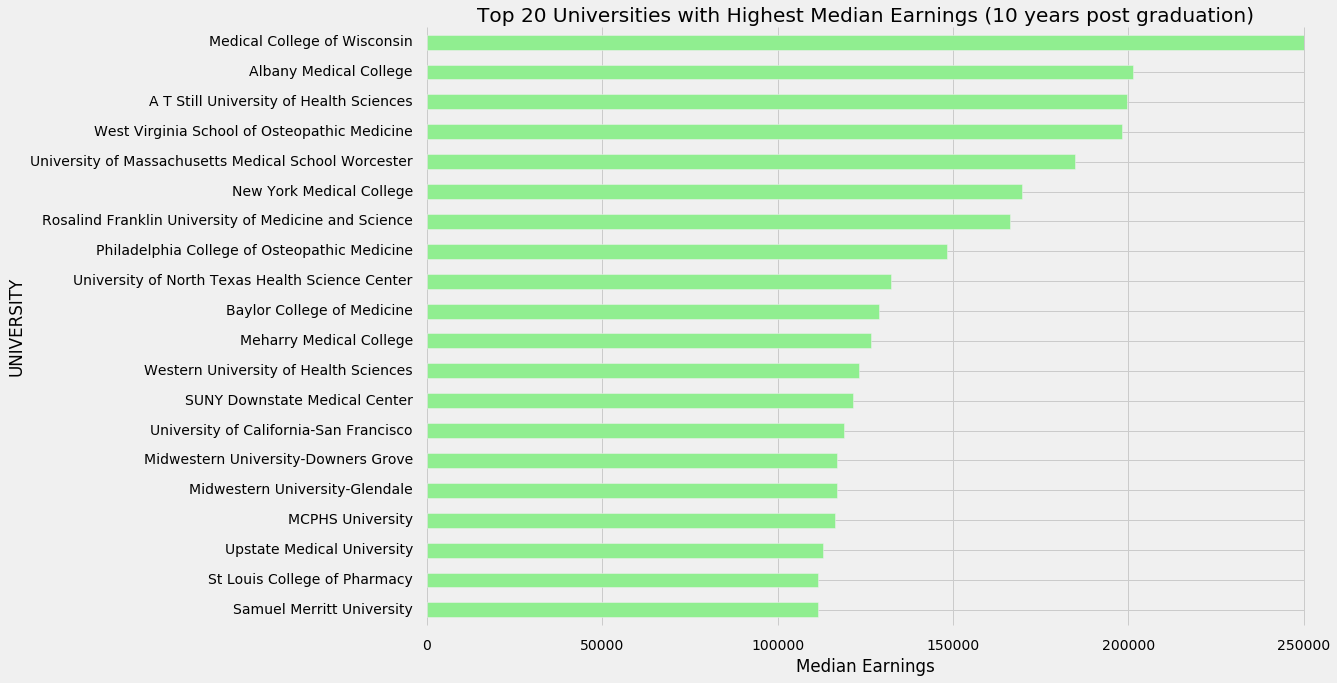

In [6]:
plt.style.use('fivethirtyeight')
fig, ax = plt.subplots()
topmedian3['MEDIAN EARNINGS, 10 YEARS OUT'].plot(kind='barh', ax=ax,  color="lightgreen")
fig.set_size_inches(14, 10)
ax.set_xlabel('Median Earnings')
ax.set_title('Top 20 Universities with Highest Median Earnings (10 years post graduation)')
ax.spines['left'].set_position(('outward', 10))
ax.spines['bottom'].set_position(('outward', 10))
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

## Top 20 Universities by Median Earnings

The medical college of Wisconsin has the highest median earnings at about a quarter of a million dollars. It may not be a surprise to many, but medical, science, and health related Universities comprise nearly 100% of the top 20 unversities and a very high percent of the top 100 universities nationwide. 

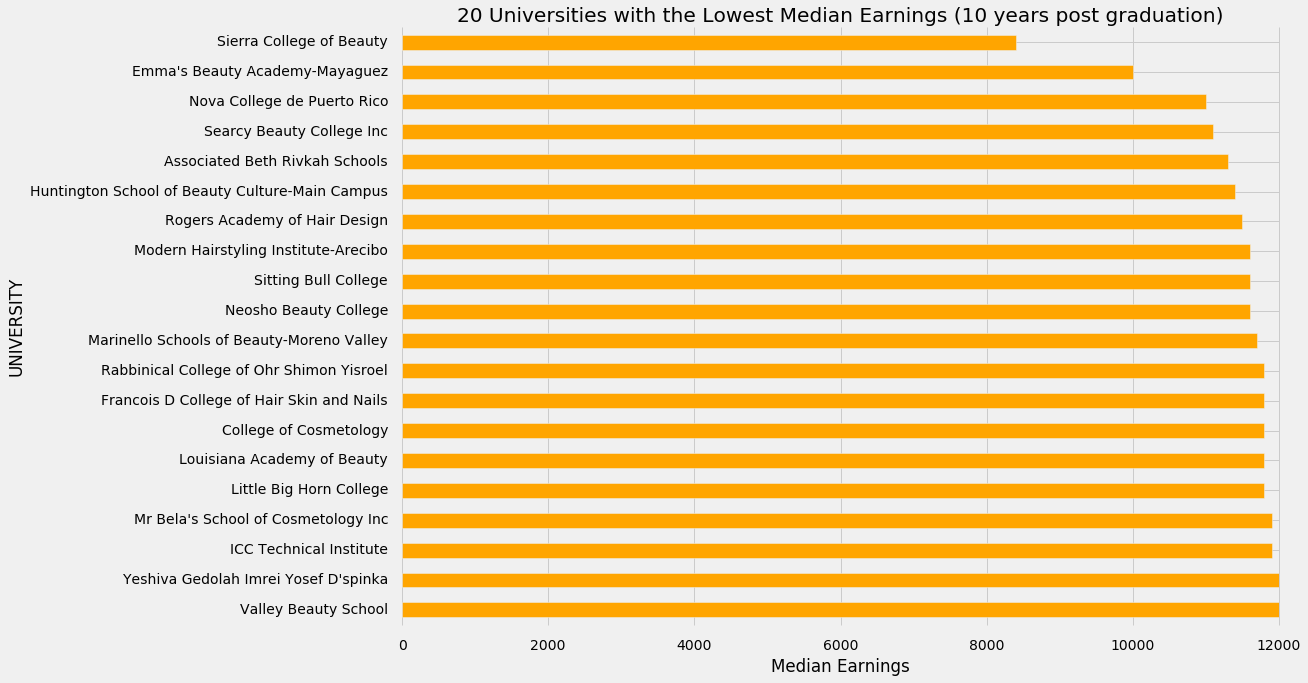

In [7]:
plt.style.use('fivethirtyeight')
fig, ax = plt.subplots()
topmedianalt3['MEDIAN EARNINGS, 10 YEARS OUT'].plot(kind='barh', ax=ax,  color="orange")
fig.set_size_inches(14, 10)
ax.set_xlabel('Median Earnings')
ax.set_title('20 Universities with the Lowest Median Earnings (10 years post graduation)')
ax.spines['left'].set_position(('outward', 10))
ax.spines['bottom'].set_position(('outward', 10))
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

## 20 Universities with the Lowest Median Earnings

Beauty and cosmetology schools make up the majority of the lowest median earnings schools.  

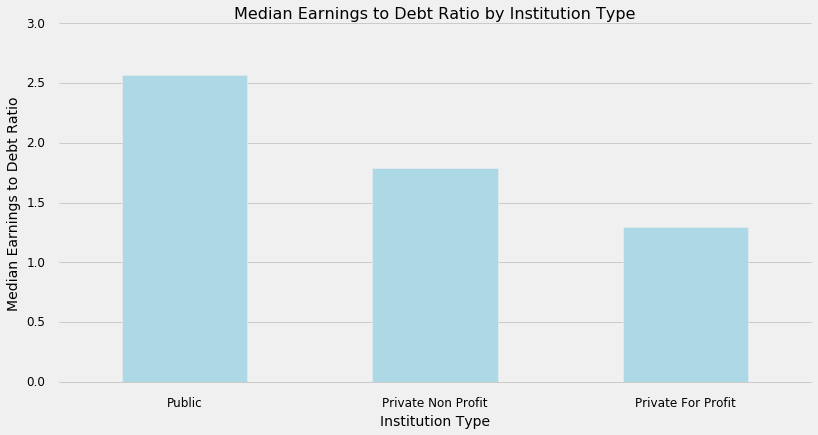

In [8]:
inst_summary = pd.pivot_table(newscore2, index=['CONTROL'], values=['MEDIAN EARNINGS, 10 YEARS OUT', 'MEDIAN DEBT'], 
                              aggfunc=np.sum)
inst_summary = inst_summary.reset_index()

plt.style.use('fivethirtyeight')
fig, ax = plt.subplots()
fig.set_size_inches(12, 6)

n_groups = 3
index = np.arange(n_groups)
bar_width = 0.5
opacity = 1.0

ax.bar(inst_summary['CONTROL'], inst_summary['MEDIAN EARNINGS, 10 YEARS OUT']/inst_summary['MEDIAN DEBT'], 
       bar_width, alpha=opacity, align='center', color='lightblue')
ax.set_title('Median Earnings to Debt Ratio by Institution Type', fontsize=16)
ax.set_xlabel('Institution Type', fontsize=14)
ax.set_ylabel('Median Earnings to Debt Ratio', fontsize=14)
plt.tick_params(axis='both', which='major', labelsize=12)

# Tufte-like axes
ax.spines['left'].set_position(('outward', 10))
ax.spines['bottom'].set_position(('outward', 10))
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.set_xticks(index + bar_width*2)
ax.set_xticklabels(('Public', 'Private Non Profit', 'Private For Profit'))
ax.xaxis.grid(False)

plt.show()


## Earnings to Debt Ratio by Institution Type

The graph above shows the Median Earnings to Debt ratio for students graduating from Public, Private Non Profit, and Private For Profit institutions. Longer bars represent greater value for students as this corresponds to more earnings per dollar of debt.

Public institutions prove to have the greatest value, while Private For Profit institutions provide the least value. Perhaps what's more surprising though is the significant gap between Public and Private Non Profit, which further enforces the point that Public universities provide the best value to prospective college students.

## Conclusion

In choosing a university, one must consider many factors. But in terms of median earnings as compared to median debt, one can make an informed decision by considering 1) whether the university is public, private nonprofit, or private forprofit, 2) the locale in which the university is located, and 3) whether the school is a medical, science, or helath related institution.

Public universities generally outperform private instituitons when it comes to median earnings to median debt, both on a 10-year horizon. Urban and suburban universities tend to have higher median earnings than rural universities. Our two cents: go for public urban/suburban! 

## References

U.S. Department of Education, Data, https://collegescorecard.ed.gov/data/